# Confidence Intervals and Sample Size

## 1. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportion of the vote that each candidate received from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [2]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

vote
C
T
C
T
C
C
T
T
C
C


Below, we have given you code that will use bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

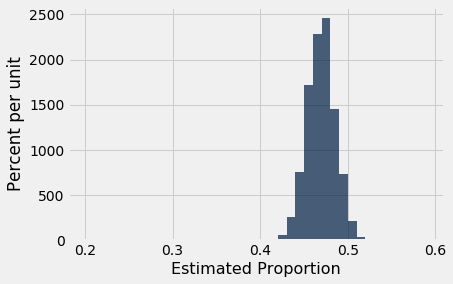

In [3]:
def proportions_in_resamples():
    statistics = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample()
        sample_statistic = np.count_nonzero(bootstrap.column('vote') == 'C')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples()
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 1.** Using the array `sampled_proportions`, compute an approximate 95% confidence interval for the true proportions of voters planning on voting for candidate C.  (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

In [4]:
c_lower_bound = percentile(2.5, sampled_proportions)
c_upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.439000, 0.501000]


In [5]:
_ = ok.grade('q1_1')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/M8MNBR
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



**Question 2.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

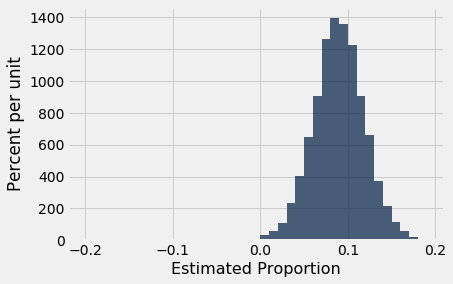

In [6]:
bins = bins=np.arange(-0.2,0.2,0.01)

def leads_in_resamples():
    statistics = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample()
        sample_statistic = (np.count_nonzero(bootstrap.column('vote') == 'C')/num_votes) - (np.count_nonzero(bootstrap.column('vote') == 'T')/num_votes)
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Proportion', sampled_leads).hist(bins=bins)

In [7]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.033000, 0.501000]


In [8]:
_ = ok.grade('q1_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/1w2EpG
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer might have been different; that doesn't mean it was wrong.)

#### Question 1
Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

No we cannot say that. Instead, we can say that we are 95% confident that the process we used results in a good interval, one where the proportion of Candidate C voters lies in the given range.

#### Question 2
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

False, as the confidence interval has nothing to do with the probability that the interval contain the proportion of the population voting for C. The 95% confidence interval instead indicates that the process of estimation is correct about 95% of the time. It wouldn't make sense for the true proportion of the population to be in the interval 95% of the time as it is either not in the interval or in the interval, there is no inbetween.



**A note about this question (this is outside of the scope of this class. If you don't already know what Bayesian and Frequentist reasoning are, don't worry about it!):** You may recall that there are different philosophical interpretation of probability. The Bayesian interpretation says that it is meaningful to talk about the probability that the interval covers the true proportion, but a Bayesian would perform a different calculation to calculate that number; we have no guarantee that it is 95%. All we are guaranteed is the statement in the answer to the next question.


#### Question 3
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

0.95*10000 = 9500

**Question 4**

The staff also created 80%, 90%, and 99% confidence intervals from one sample, but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents. (Write the percentage after each interval below.) **Then**, explain your thought process.

**Answers:**

$[.444,.495]$: 90%

$[.450,.490]$: 80%

$[.430,.511]$: 99%

An x% confidence interval essentially asks for the range of values in the "middle x%" of the sample. Thus, a larger confidence interval would ask for a larger percentage of values in the middle of the sample, implying that a larger range will need to be given. The 99% confidence interval will have the largest range while the 80% confidence interval will have a smaller range.

#### Question 5

Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question:** Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

As the null hypothesis falls outside the 95% confidence interval, and that we are using a 5% p-value cutoff, we reject the null as 0 falls outside the interval calculated above.

#### Question 6
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

With a 1% p-value cutoff, we will essentially be using a 99% confidence interval. This would increase the range of the 95% confidence interval computed above, lowering the lower bound and increasing the upper bound. However, it is unclear whether the lower bound will fall enough such that 0 will now lie within the 99% confidence interval. Thus, we are unable to tell using our confidence interval.

#### Question 7
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

A 10% p-value cutoff means that we are using a 90% confidence interval. As the null hypothesis fell outside of the 95% confidence interval, and a 90% confidence interval will have a smaller range of values, we can still reject the null hypothesis as 0 will not lie within a 90% confidence interval.

## 3. Grouped Means


Suppose you'd like to know about the ages of the people in a small town.  The local government collects this data about everyone in the town, but to ensure that you don't see any individual's age, it only makes public the number of people of each age.  (This could have been done by calling `group` on the original data table.)  So the first few rows of the dataset look something like this:

In [9]:
ages =  Table().with_columns('age', [0, 1, 2, 3, 5, 6], 'count', [2, 5, 1, 4, 10, 1])
ages

age,count
0,2
1,5
2,1
3,4
5,10
6,1


That means there were 2 people age 0, 5 people age 1, etc. Nobody is age 4.

<div class="hide">\pagebreak</div>
#### Question 1
After you get the data, you first want to compute the mean age of the people in the town.

Write a function called `grouped_mean`.  It should take as its argument a table like the one above, except that the columns might have different names.  It should return the mean of the numbers in the dataset, assuming the first column contains the numbers themselves and the second column contains the count of each number, as in the example.

*Remember:* Even if you don't know the column name for the first column, you can access it by saying `tbl.column(0)`.

In [10]:
def grouped_mean(t):
    assert t.num_columns == 2, 'Expected a 2-column table t'
    new_t = t.with_column("sum", t.column(0)*t.column(1))
    return np.sum(new_t.column(2))/np.sum(new_t.column(1))

In [11]:
_ = ok.grade('q3_1')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/XD1qwV
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



<div class="hide">\pagebreak</div>
#### Question 2
Next, you want to summarize how spread out the ages are, so you decide to compute their standard deviation.

Write a function called `grouped_std`.  It should take as its argument a table like the one above, except that the columns might have different names.  It should return the standard deviation of the numbers in the dataset, assuming the first column contains the numbers and the second column contains the count of each number, as in the example.

*Hint:* 
1. Find the squared deviation from the mean for each item.
2. Then the standard deviation is the square root of the mean of that list of squared deviations.

You've already written a function that computes means of grouped numbers, so that should be useful.

__If you need a further hint, here is an example of how to calculate the standard deviation of an array of numbers:__

Suppose we want to find the standard deviation of a list `numbers`.

    numbers = make_array(5, 7, 1, 2, 6)

First, calculate the mean of the array.

    mean_of_numbers = np.mean(numbers)
    
Then compute the squared deviations from the mean for each element in `numbers`.

    squared_deviations = (numbers - mean_of_numbers) ** 2

Then the standard deviation is simply the square root of the mean of that list.

    sd = np.sqrt(np.mean(squared_devations))

In [13]:
def grouped_std(t):
    mean = grouped_mean(t)
    new_t = t.with_column("Var for number", (t.column(0) - mean)**2 * t.column(1))
    return (sum(new_t.column(2))/sum(new_t.column(1)))**0.5

In [14]:
_ = ok.grade('q3_2')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/82kWAr
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



<div class="hide">\pagebreak</div>
Maybe you aren't sure whether your code for the previous question is correct.  Testing your own code on simple cases is an important skill.  Let's practice that.

The built-in NumPy function `np.std` computes the standard deviation of an array of numbers.  It doesn't work for grouped data, so you couldn't have just used it in your answer to question 2!  But we can use it to check `grouped_std` by manually un-grouping some small datasets (duplicating each number once for each count, and putting the duplicated numbers into an array) and calling `np.std` on the result.

|age|count|
|-|-|
|10|1|
|15|2|

$$\longleftrightarrow$$

$$\verb|make_array(10, 15, 15)|$$

<div class="hide">\pagebreak</div>
#### Question 3
For the two tables in the following **two** cells, create an array representing the original (un-grouped) dataset it came from, and then use it to verify that `grouped_std` computes the right answer on that table.  We've done most of the first one for you.

In [15]:
example_0 = Table().with_columns(
    "age", make_array(10, 15),
    "count", make_array(1, 2))
grouped_std_0 = grouped_std(example_0)
example_0_ungrouped = make_array(10, 15, 15)
# The standard deviation of example_0_ungrouped, according to NumPy:
numpy_std_0 = np.std(example_0_ungrouped)
print("NumPy answer:\t", numpy_std_0, "\nyour answer:\t", grouped_std_0)

NumPy answer:	 2.35702260396 
your answer:	 2.35702260396


In [16]:
example_1 = Table().with_columns(
    "age", make_array(10, 15, 20, 25),
    "count", make_array(1, 2, 3, 0))
# Fill in the rest of the test, as above, so that the last line
# prints out the results of the test.
grouped_std_1 = grouped_std(example_1)
example_1_ungrouped = make_array(10, 15, 15, 20, 20, 20)
numpy_std_1 = np.std(example_1_ungrouped)
print("NumPy answer:\t", numpy_std_1, "\nyour answer:\t", grouped_std_1)

NumPy answer:	 3.7267799625 
your answer:	 3.7267799625


<div class="hide">\pagebreak</div>
If your results are different, that means there's an error in your `grouped_std` function (or your `grouped_mean` function).  Go back and fix it!  Each time you make a change, you can rerun the tests you've written to see if you've gotten it right.

## 4. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by $$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ In other words, suppose we start with *any distribution* that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

<div class="hide">\pagebreak</div>
**Question 1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  The average of several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [17]:
def sample_size_n(n):
    coin = make_array(0, 1)
    sample_proportions = make_array()
    for i in np.arange(5000):
        # An array of the results of n coin flips (0s and 1s):
        flips = np.random.choice(coin, n)
        sample_proportion = sum(flips)/n
        sample_proportions = np.append(sample_proportions, sample_proportion)
    return sample_proportions

sample_size_n(5)

array([ 0.6,  0.4,  0.2, ...,  0.4,  0.6,  0.6])

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for various sample sizes. Drag the slider or click on the number to the right to type in a sample size of your choice. The x- and y-scales are kept the same to facilitate comparisons. 

In [18]:
# Just run this cell
from ipywidgets import interact

def outer(f):
    def graph(x):
        bins = np.arange(-0.01,1.05,0.02)
        sample_proportions = f(x)
        Table().with_column('Sample Size: {}'.format(x), sample_proportions).hist(bins=bins)
        plots.ylim(0, 30)
        print('Sample SD:', np.std(sample_proportions))
        plots.show()
    return graph
    
interact(outer(sample_size_n), x=(0, 400, 1), continuous_update=False);

# Notice the shape of the graph as the sample size increases and decreases.
# Min sample size is 0, max is 400
# The graph will refresh a few times when you drag the slider around

interactive(children=(IntSlider(value=200, description='x', max=400), Output()), _dom_classes=('widget-interact',))

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

<div class="hide">\pagebreak</div>
**Question 2:** In the plot for a sample size of 10, why are the bars spaced at intervals of .1, with gaps in between?

As the sample size is 10, the statistic, the sum of flips/sample size, will always be in multiples of 0.1 as the sum of flips is divided by 10. Thus, the bars are spaced in intervals of 0.1 as a reflection of this.

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [19]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

<div class="hide">\pagebreak</div>
**Question 3:** Write a function called `predict_sd`.  It takes a sample size `n` (a number) as its argument.  It returns the predicted standard deviation of the mean delay time for samples of size `n` from the flight delays (represented in the table `united`).

In [20]:
def predict_sd(n):
    return united_std/np.sqrt(n)

predict_sd(10)

12.484735400972708

In [21]:
_ = ok.grade('q4_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/NkNXn8
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



<div class="hide">\pagebreak</div>
**Question 4:** Write a function called `empirical_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples with replacemnt of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 500 samples**.

*Hint:* This function will be similar to the `sample_size_n` function you wrote earlier.

In [22]:
def empirical_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n).column("Delay")
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sd(10)

12.022983222145825

In [23]:
_ = ok.grade('q4_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/QWQjq5
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



<div class="hide">\pagebreak</div>
The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes.

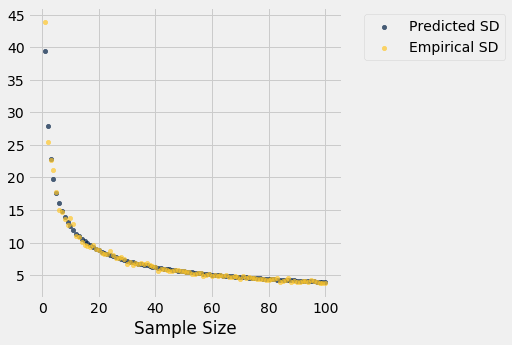

In [24]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')

<div class="hide">\pagebreak</div>
**Question 5:** The empirical SDs are very close to the predicted SDs, but they're not exactly the same. Explain the reason for the similarities and reason for the differences?

The empirical SDs are close to the predicted SDs, but are not exactly the same, as the predicted SD was taken from the bootstrap method of a random sample of the population. Thus, as the sample size increases, the variability between the predicted SD and the empirical SD will become smaller, as the sample becomes more like the population. However, when the sample size is small, the difference between the predicted and empirical SDs is quite large as the small sample size means it is relatively unlike the population.

## 5. Polling and the Normal Distribution


Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal or vertical axes), called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition.

In [25]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))
sample_size = sum(sample.column("Count"))
sample_proportions = sample.with_column(
    "Proportion", sample.column("Count") / sample_size)
sample_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


She uses 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  Run the next cell to see the empirical distribution of Yes proportions in the 10,000 resamples.

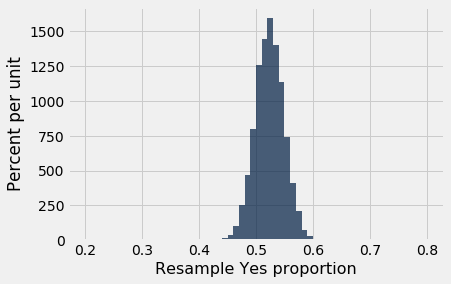

In [26]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = proportions_from_distribution(sample_proportions, "Proportion", sample_size)
    resample_yes_proportions = np.append(resample_yes_proportions, resample.column("Random Sample").item(0))
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

<div class="hide">\pagebreak</div>
#### Question 1
How does the Central Limit Theorem (CLT) explain the distribution we see above?

The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn. Thus, even though the population distribution is not normal, the sample distribution above is roughly normal as the size of the sample drawn is quite large (10000).

<div class="hide">\pagebreak</div>
In a population whose members are 0 and 1, there is a simple formula for the standard deviation of that population:

$$\texttt{standard deviation} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

<div class="hide">\pagebreak</div>
#### Question 2
Using only the CLT and the numbers of Yes and No voters in our sample of 400, compute (_algebraically_) a number `approximate_sd` that's the predicted standard deviation of the array `resample_yes_proportions` according to the Central Limit Theorem. **Do not access the data in `resample_yes_proportions` in any way.** 

$\text{SD of sample means} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}$

Remember that if we do not know the population SD, we can use the sample SD as a reasonable approximation in its place.

In [27]:
approximate_sd = (0.525*0.475)**0.5/400**0.5
approximate_sd

0.024968730444297725

In [28]:
_ = ok.grade('q5_2')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/yP07D6
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



<div class="hide">\pagebreak</div>
#### Question 3
Compute the standard deviation of the array `resample_yes_proportions` to verify that your answer to question 2 is approximately right.

In [29]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.024987711948825972

In [30]:
_ = ok.grade('q5_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/ERA12W
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



<div class="hide">\pagebreak</div>
#### Question 4
**Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

In [31]:
lower_limit = sample_proportions.column(2).item(0) - 2*approximate_sd
upper_limit = sample_proportions.column(2).item(0) + 2*approximate_sd
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.47506253911140456 upper: 0.5749374608885954


In [32]:
_ = ok.grade('q5_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw06.ipynb'.
Backup... 100% complete
Backup successful for user: manikui@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw06/backups/G6Dz2K
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



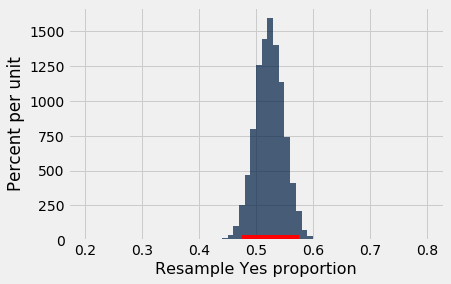

In [33]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plots.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

<div class="hide">\pagebreak</div>
Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 12 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

<div class="hide">\pagebreak</div>
#### Question 5
How did Michelle arrive at that answer? Please be clear in your steps/explanations.

The Central Limit Theorem says that the probabilities for the sample proportion are roughly normally distributed, centered at the population proportion of 1's, with an SD equal to the SD of the population of 0's and 1's divided by the square root of the sample size. Given that the campaign would be ok with the SD of the sample mean being only 0.005, this gives a lower bound of the SD of the sample mean that we can apply to the equation of the central limit theorem. Furthermore, the population standard devation in the equation can be replaced with the previous calculation from the sample (approximate_sd). Thus, we can solve for the smallest possible sample size, given that the SD of the sample mean should be 0.005. 10000 - the calculated sample size yields 9,975, which Michelle found under that assumption.